In [2]:
#POLYNOMIAL REGRESSION



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#READING DATA
df=pd.read_csv('FuelConsumptionCo2 (1).csv')

df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#selecting features to use for regression

cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)




,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<module 'matplotlib.pyplot' from 'c:\\Users\\LEGION\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

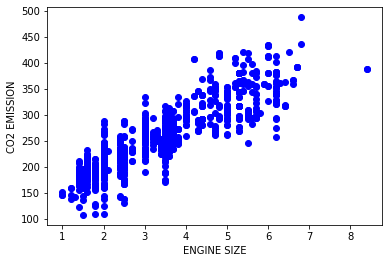

In [5]:
#PLOTTING EMISSION VSENGINE SIZE

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')

plt

In [6]:
#creating train and test dataset

msk=np.random.rand(len(df))< 0.8
train= cdf[msk]
test=  cdf[msk]



In [7]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

train_x= np.asanyarray(train[['ENGINESIZE']])

train_y= np.asanyarray(train[['CO2EMISSIONS']])

test_x=  np.asanyarray(test[['ENGINESIZE']])

test_y= np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)

train_x_poly=poly.fit_transform(train_x)

train_x_poly


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [8]:
#now that the polynomial rag has been converted to a linear reg therefore we can use the linear reg function to solve it


clf=linear_model.LinearRegression()

train_y_ =clf.fit(train_x_poly, train_y)

#the cofficients

print('coefficients:',clf.coef_)

print('intercept:',clf.intercept_)




coefficients: [[ 0.         48.60360603 -1.27030097]]
intercept: [110.54512695]


Text(0, 0.5, 'Emission')

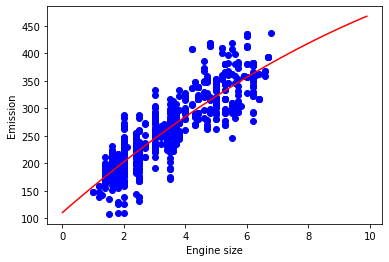

In [9]:
#plotting the coef and intercept

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [10]:
#EVALUATION

from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score ( test_y, test_y_ ) )


Mean absolute error: 23.48
Residual sum of squares (MSE): 951.53
R2-score: 0.76


Coefficients:  [[ 0.         23.02430326  6.16111496 -0.65224758]]
Intercept:  [136.54178499]
Mean absolute error: 23.47
Residual sum of squares (MSE): 948.66
R2-score: 0.76


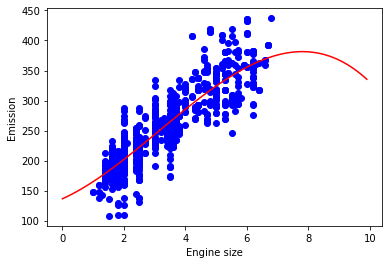

In [11]:
#same question with degree 3 polynomial

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )
